# Lecture 5 - Multi-layer Perceptron Demo
## From Scratch
Author: Kaihang Zhang<br>
 khzhang2@connect.hku.hk <br>
208 Haking Wong Building<br>
Department of Civil Engineering<br>
The University of Hong Kong<br>
December 22, 2022<br>

In [1]:
##################################################################################################################
##      Script template created for the course CIVL 7018 at The University of Hong Kong.                        ##
##      in Spring 2023 semester                                                                                 ##
##      Licensing Information:  You are free to use or extend this project if:                                  ##
##          (1) You don't distribute or publish coding solutions for CIVL 7018 Assignments online.              ##
##          (2) You retain this notice.                                                                         ##
##          (3) You provide clear attribution to The University of Hong Kong                                    ##
##################################################################################################################

Consider the ridership of a public transportation system in the San Francisco
bay area, Bay Area Rapid Transit (BART). Recently, a group of researchers is
assuming that the ridership of the transit system is related to some
socio-economic factors, which are preliminarily the **total population near
each station, number of households that own 0 vehicles, total
employment, and total road network density**. The raw census data is
collected by the [Environment Protection Agency of the United States](https://www.epa.gov/sites/default/files/2021-06/documents/epa_sld_3.0_technicaldocumentationuserguide_may2021.pdf) while
the ridership data is available at the BART’s [official website](https://www.bart.gov/about/reports/ridership). The data for the
catchment area for each station is processed by Github user [HaTT2018](https://github.com/HaTT2018/BART_Ridership_Prediction).

To make this problem as simple as possible, we only investigate the ridership from station *Embarcadero* (the CBD of San Francisco) to other stations. (picture adopted from https://www.bart.gov/system-map)

<img title="Map of BART" src="./img/BART.png" width="800">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [3]:
# take the first 48 stations becasue the 
# last 2 stations were not yet opened
# by the time this data was collected
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, 1:]
data_BART_sld.head()

,TotPop,AutoOwn0,TotEmp,Tot Rd Dens
0,11084,1664,33120,42.232657
1,142973,20505,103479,32.296762
2,36177,4704,47570,31.822631
3,104191,8018,39663,32.894203
4,70630,1142,13924,20.531431


In [4]:
# The file "3d_daily.npy" contains the daily ridership
# data from each station to all the other stations.
# Its shape is [50, 50, 365]. Each dimension represents
# origin, destination, day in the year respectively

# Embarcadero is the 18th station in the list
OD_BART = np.load('3d_daily.npy').sum(axis=2)[17, :48]

In [5]:
print('Shape of data_BART_sld', data_BART_sld.shape)
print('Shape of OD_BART', OD_BART.shape)

Shape of data_BART_sld (48, 4)
Shape of OD_BART (48,)


## The model layout

Our job is to train an MLP model which takes "data_BART_sld" as input and generate "OD_BART" as output and make it as close to the real data as possible.

Consider a simple MLP, with 1 input layer, 1 hidden layer, and 1 output layer. The input layer has a dimension of 4 because we have 4 attributes of the scio-economic census. The output layer is 1-dimensional because the ridership is a scalar. The number of dimension of the hidden layer is set to be 2 for the sake of simplicity. The activation function is Sigmoid function as introduced in the lecture.

<img src="./img/MLP_demo.png" width="500">

We do not consider bias in this network for sake of simplicity. 

$o1 = k_1 \times a_1 + k_2 \times a_2$

$a_1 = \sigma(h_1)$,
$a_2 = \sigma(h_2)$ 

$h_1 = x_1 \times w_{11}+x_2 \times w_{12}+x_3 \times w_{13}+x_4 \times w_{14}$ 

$h_2 = x_2 \times w_{21}+x_2 \times w_{22}+x_3 \times w_{23}+x_4 \times w_{24}$ 

In vector-matrix form, we have:

$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$,
$\mathbf{h} = \begin{bmatrix} h_1 \\ h_2 \end{bmatrix}$,
$\mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$,
$\mathbf{W} = \begin{bmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \end{bmatrix}$,
$\mathbf{K} = \begin{bmatrix} k_1 & k_2 \end{bmatrix}$ 

$\mathbf{h} = \mathbf{W} \times \mathbf{x}$

$\mathbf{a} = \sigma(\mathbf{h})$

$\mathbf{o} = \mathbf{K} \times \mathbf{a}$

Finally, $\mathbf{o} = \mathbf{K} \times \sigma(\mathbf{W} \times \mathbf{x})$

## Gradient descent and the loss function

Suppose the label true value is $y$ given input $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$, and we use squared loss function $L = \frac{1}{2}(o1 - y)^2$, which represents how much the output is deviated from the true value.

$\mathbf{W}$ and $\mathbf{K}$ contain all the parameters (10 numbers in total) we need to update in the training process.

Before training starts, we assign some random initial values to our parameters $\mathbf{W}$ and $\mathbf{K}$.

During training, we obtain $\frac{\partial L}{\partial \mathbf{W}}$ and $\frac{\partial L}{\partial \mathbf{K}}$, then we use $\mathbf{W}_i = \mathbf{W}_{i-1} - \frac{\partial L}{\partial \mathbf{W}} \times lr$ and $\mathbf{K}_i = \mathbf{K}_{i-1} - \frac{\partial L}{\partial \mathbf{K}} \times lr$ to update $\mathbf{W}$ and $\mathbf{K}$ in order to make loss $L$ smaller and smaller.

This is the basic idea of gradient decent, which is a popular set of non-convex optimization methods used in machine learning especially in deep learning.

## The expressions for the gradients of our 8 parameters in $W$ and 2 parameters in $K$

Our loss function is: $L = \frac{1}{2}(o_{1}-y)^2 = \frac{1}{2}(\mathbf{K} \times \mathbf{a} - y)^2 = \frac{1}{2}((k_1 \times a_1 + k_2 \times a_2) - y)^2$

$\frac{\partial L}{\partial \mathbf{K}} = 
\begin{bmatrix} \frac{\partial L}{\partial k_1} & \frac{\partial L}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} \frac{\partial L}{\partial o_{1}} \frac{\partial o_{1}}{\partial k_1} & \frac{\partial L}{\partial o_{1}} \frac{\partial o_{1}}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} (o_{1}-y) a_1 & (o_{1}-y) a_2 \end{bmatrix} = 
\left(\begin{bmatrix}a_1 \\ a_2\end{bmatrix}(o_{1}-y)\right)^T = (o_{1}-y)^T\mathbf{a}^T$

$\frac{\partial L}{\partial \mathbf{W}}$ = 
$\begin{bmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} & \frac{\partial L}{\partial w_{14}} \\ 
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} & \frac{\partial L}{\partial w_{24}}
\end{bmatrix}$ = 
$\begin{bmatrix} 
  \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{11}} 
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{12}} 
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{13}}
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{14}} \\ 
  \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{21}} 
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{22}} 
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{23}} 
& \frac{\partial L}{\partial o_{1}}\frac{\partial o_{1}}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{24}} 
\end{bmatrix}$ =
$\begin{bmatrix} 
  (o_{1}-y)k_1\frac{\partial \sigma(h_1)}{\partial h_1}x_1 
& (o_{1}-y)k_1\frac{\partial \sigma(h_1)}{\partial h_1}x_2
& (o_{1}-y)k_1\frac{\partial \sigma(h_1)}{\partial h_1}x_3
& (o_{1}-y)k_1\frac{\partial \sigma(h_1)}{\partial h_1}x_4 \\ 
  (o_{1}-y)k_2\frac{\partial \sigma(h_2)}{\partial h_2}x_1
& (o_{1}-y)k_2\frac{\partial \sigma(h_2)}{\partial h_2}x_2
& (o_{1}-y)k_2\frac{\partial \sigma(h_2)}{\partial h_2}x_3
& (o_{1}-y)k_2\frac{\partial \sigma(h_2)}{\partial h_2}x_4
\end{bmatrix}$ = 
$(o_{1}-y)\begin{bmatrix} 
k_1\frac{\partial \sigma(h_1)}{\partial h_1} \\ 
k_2\frac{\partial \sigma(h_2)}{\partial h_2}
\end{bmatrix} \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}$ =
$\begin{bmatrix}
k_1 & 0 \\
0 & k_2 
\end{bmatrix}
\begin{bmatrix} 
\frac{\partial \sigma(h_1)}{\partial h_1} \\ 
\frac{\partial \sigma(h_2)}{\partial h_2}
\end{bmatrix} 
(o_{1}-y)
\begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}$

In [6]:
# define the sigmoid function
def sigmoid(X):
    # X: A numpy.ndarray object
    
    return 1 / (1 + np.exp(-X))

In [7]:
# define the partial derivative of sigmoid function
def psigmoid(X):
    # X: A numpy.ndarray object

    return np.exp(-X) / (1 + np.exp(-X))**2

In [8]:
# define the forward propagation
def DNNforward(X, W, K):
    # X: dataset input features, numpy.ndarray of shape (n, 4)
    # W: current weight matrix W, numpy.ndarray of shape (2, 4)
    # K: current weight matrix K, numpy.ndarray of shape (2,)
    # return: (H, A, O)
    # H: current hidden layer output value H, numpy.ndarray of shape (2, n)
    # A: current activation layer output A, numpy.ndarray of shape (2, n)
    # O: current DNN model output O, numpy.ndarray of shape (n, )
    
    H = W @ X.T
    A = sigmoid(H)
    O = K @ A
    
    return H, A, O

In [9]:
# define the backward propagation
def DNNbackward(X, y, W, K, H, A, O):
    # X: dataset input features, numpy.ndarray
    # y: dataset labels, numpy.ndarray
    # W: current weight matrix W, numpy.ndarray
    # K: current weight matrix K, numpy.ndarray
    # H: current hidden layer output value H, numpy.ndarray
    # A: current activation layer output A, numpy.ndarray
    # O: current DNN model output O, numpy.ndarray
    # return: (pLpW, pLpK)
    # pLpW: current gradient of Loss with respect to W
    # pLpK: current gradient of Loss with respect to K
    
    pLpW = np.array([[K[0], 0], [0, K[1]]]) @ psigmoid(H) * (O-y) @ X
    pLpK = (O-y).T @ A.T
    
    # we are considering the mean derivative of all data samples!
    return pLpW/X.shape[0], pLpK/X.shape[0]

In [10]:
# gradient decent function in batches
def train(X, y, W, K, lr, num_epochs=10, batch_size=10, print_loss=False):
    # X: dataset input features, numpy.ndarray
    # y: dataset labels, numpy.ndarray
    # W: current weight matrix W, numpy.ndarray
    # K: current weight matrix K, numpy.ndarray
    # lr: learning rate, float or int
    # nump_epochs: total number of epochs we train our NN model, int
    # batch_size: number of samples in each batch, int
    # print_loss: whether we print loss in each epoch during training, bool
    # return: (W_list, K_list)
    # W_list: list of numpy.ndarrays containing all the W parameters after each epoch
    # K_list: list of numpy.ndarrays containing all the K parameters after each epoch
    W_list, K_list = [], []
    train_loss, val_loss = [], []
    dataset_size = len(y)
    for epoch in range(num_epochs):
        for batch_idx in range(int(np.ceil(dataset_size/batch_size))):
            start_idx = batch_idx * batch_size
            end_idx = min((batch_idx+1)*batch_size, dataset_size-1)
            H, A, O = DNNforward(X[start_idx:end_idx], W, K)
            if print_loss and epoch%50==0:
                print("Epoch "+str(epoch+1)+", batch "+str(batch_idx+1)+", loss = "+str(loss(y[start_idx:end_idx], O)), end='\n')
            # update W and K
            pLpW, pLpK = DNNbackward(X[start_idx:end_idx, :], y[start_idx:end_idx], W, K, H, A, O)
            W = W - lr*pLpW
            K = K - lr*pLpK
            train_loss.append(loss(y[start_idx:end_idx], O))
            
            _,_,y_val_pred = DNNforward(X_val, W, K)
            val_loss.append(loss(y_val_pred, y_val))
            
        W_list.append(W)
        K_list.append(K)
    return W_list, K_list, train_loss, val_loss

In [11]:
# define the loss function
def loss(y, O):
    # we use squared loss
    return np.mean(1/2 * (y-O)**2)

## Prepare data
We divide the original data into two parts, 70% for training and 30% for model validation. Thus, the first 33 samples are for training, and the rest of the samples are for validation.

In [12]:
X_train = minmax_scale(data_BART_sld)[:33, :]
y_train = minmax_scale(OD_BART)[:33]
X_val = minmax_scale(data_BART_sld)[33:, :]
y_val = minmax_scale(OD_BART)[33:]

In [13]:
# initialize weight parameters
np.random.seed(10)
W = np.random.uniform(size=(2,4))
K = np.random.uniform(size=(2))

# set learning rate
lr = 0.01

In [14]:
# we use full-batch train
W_list, K_list, train_loss, val_loss  = train(X_train, y_train, W, K, lr, num_epochs=300, batch_size=50, print_loss=True)


Epoch 1, batch 1, loss = 0.05688507939769296
Epoch 51, batch 1, loss = 0.03854631470613812
Epoch 101, batch 1, loss = 0.03130794539324819
Epoch 151, batch 1, loss = 0.028456412059598674
Epoch 201, batch 1, loss = 0.027334567502242717
Epoch 251, batch 1, loss = 0.026893377356756187


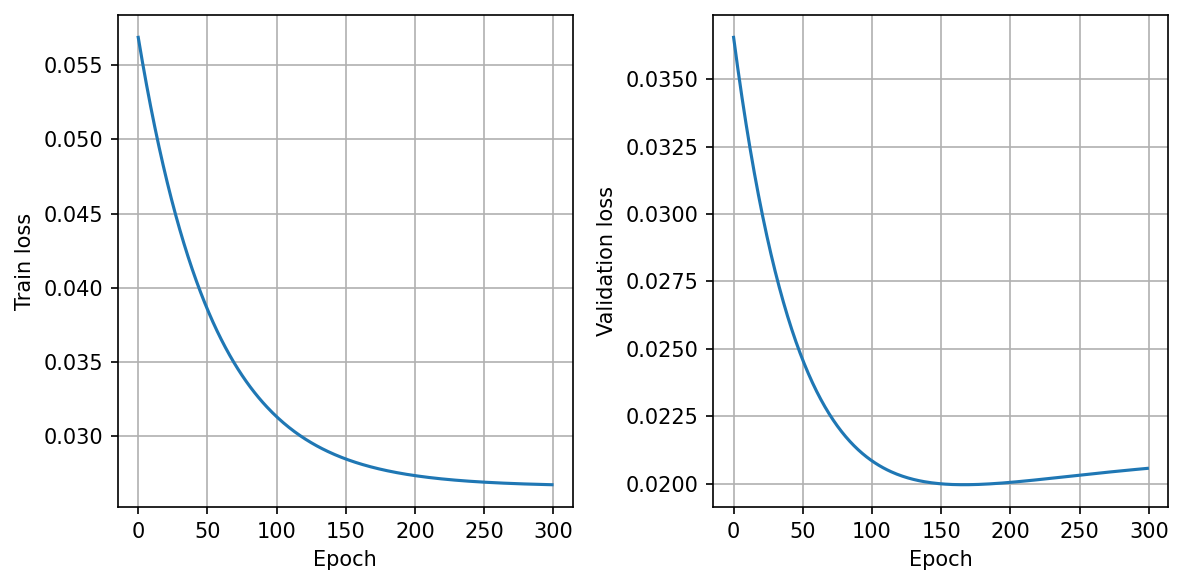

In [15]:
fig = plt.figure(figsize=[8, 4], dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(train_loss)
ax1.grid()
ax1.set_ylabel('Train loss')
ax1.set_xlabel('Epoch')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(val_loss)
ax2.grid()
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epoch')

plt.tight_layout()

In [16]:
# make prediction
_, _, y_pred = DNNforward(X_val, W_list[-1], K_list[-1])
y_pred

array([0.38161384, 0.43811272, 0.41512816, 0.38338839, 0.40811861,
       0.40577422, 0.31843194, 0.38865472, 0.40166894, 0.4184795 ,
       0.37220886, 0.35665281, 0.3740504 , 0.38458152, 0.33036378])

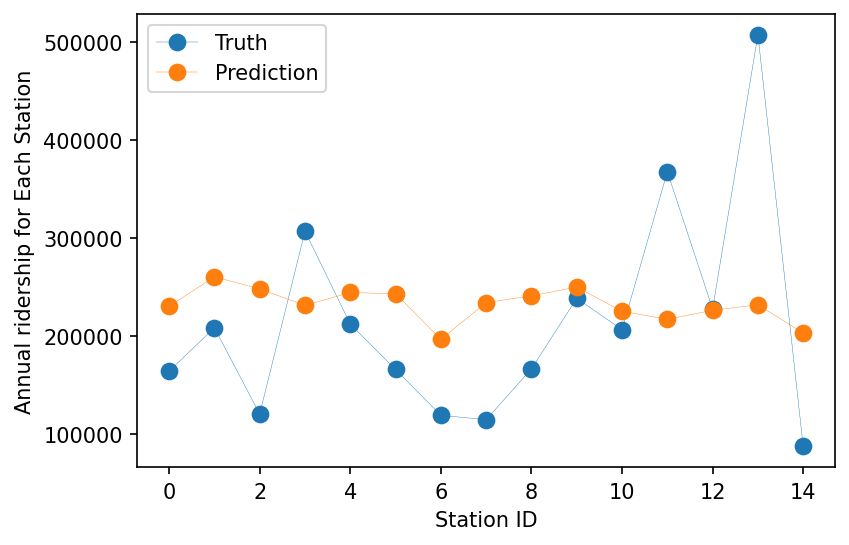

In [17]:
plt.figure(dpi=150)
plt.plot(y_val*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Truth')
plt.plot(y_pred*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Prediction')
plt.xlabel("Station ID")
plt.ylabel("Annual ridership for Each Station")
plt.legend()

## The results seem to be bad, how to improve?

## Using PyTorch

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torch.utils.data import TensorDataset
from torchvision import datasets

# if the system raises a "ModuleNotFoundError: No module named 'xxxx'".
# Use "pip install xxxx" to install the corresponding package.

#### Warning ####
# If you want to use your local GPU, do not use pip install. Check the pytorch
# official website (https://pytorch.org/) for the installation code.

### Define a network
The structure used here is called "class", you can consider it as an object, here is a network. In each class, you can define a few functions, but keep in mind that these functions can only be only used when calling this class. Check this documentation for details (https://docs.python.org/3/tutorial/classes.html).

In [19]:
# Model specification
class Simple_Network(nn.Module):
    def __init__(self, inp_dim, hid_dim, out_dim):
        super(Simple_Network, self).__init__()
        
        self.input_layer = nn.Sequential(
            nn.Linear(inp_dim, hid_dim),
            nn.Sigmoid(),
        )
        
        self.output_layer = nn.Sequential(
            nn.Linear(hid_dim, out_dim)
        )
        
    def forward(self, x):
        # x is the input data
        

        h = self.input_layer(x)  # h represents for the output for hidden layer
        y = self.output_layer(h)
        return y

### Prepare for the data

In [20]:
# I'm copying the data definition here
X_train = minmax_scale(data_BART_sld)[:33, :]
y_train = minmax_scale(OD_BART)[:33].reshape(-1, 1)
X_val = minmax_scale(data_BART_sld)[33:, :]
y_val = minmax_scale(OD_BART)[33:].reshape(-1, 1)

In [21]:
# this line returns the device that you are going to use
# if cuda is successfully installed, it will return "cuda"
# otherwise, "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)

# minibatch training, useful for big data, not useful here but I'm showing how to do this
# to realize full batch training, simply set this value to be very large
batch_size = 100  
loader_train = torch.utils.data.DataLoader(
    TensorDataset(X_train, y_train), batch_size, shuffle=True
)
iter_train = iter(loader_train)

### Train

In [22]:
# define the model and loss function
## you can play with different model specifications here!
## think about what part of the model you are modifying.
inp_dim = 4
hid_dim = 2
out_dim = 1

model = Simple_Network(inp_dim, hid_dim, out_dim).to(device)
loss_func = nn.MSELoss()

train_loss_torch = []
val_loss_torch = []

optimizer = optim.SGD(model.parameters(), lr=0.01)  # lr refers to learning rate

In [23]:
model.train()
epochs = 300

for e in range(epochs):
    for i in range(len(loader_train)):
        # obtian X and y from the dataloader
        try:
            X, y = next(iter_train)
        except:
            iter_train = iter(loader_train)
            X, y = next(iter_train)
        
        out = model(X)  # forward propagation
        loss = loss_func(out, y)  # training loss

        out_val = model(X_val)
        loss_val = loss_func(out_val, y_val)  # validation loss

        optimizer.zero_grad()
        loss.backward()  # backward propagation
        optimizer.step()  # update

        val_loss_torch.append(loss_val.cpu().detach().numpy())
        train_loss_torch.append(loss.cpu().detach().numpy())
    if e%50==0:
        print('Epoch %i   success, val loss:%.6f, train loss:%.6f'%(
            e, loss_val.cpu().detach().numpy(), loss.cpu().detach().numpy()
        ))
        

Epoch 0   success, val loss:0.834801, train loss:0.974773
Epoch 50   success, val loss:0.052472, train loss:0.088485
Epoch 100   success, val loss:0.042525, train loss:0.058501
Epoch 150   success, val loss:0.045137, train loss:0.057503
Epoch 200   success, val loss:0.045723, train loss:0.057423
Epoch 250   success, val loss:0.045820, train loss:0.057371


### Visualize the loss

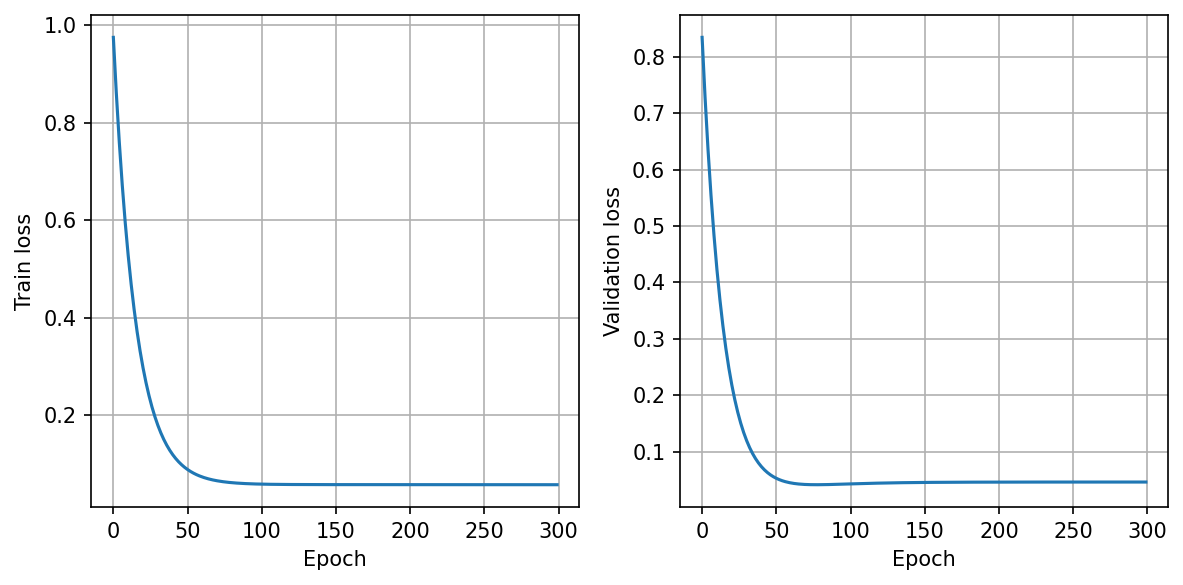

In [24]:
fig = plt.figure(figsize=[8, 4], dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(train_loss_torch)
ax1.grid()
ax1.set_ylabel('Train loss')
ax1.set_xlabel('Epoch')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(val_loss_torch)
ax2.grid()
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epoch')

plt.tight_layout()

### Visualize the result

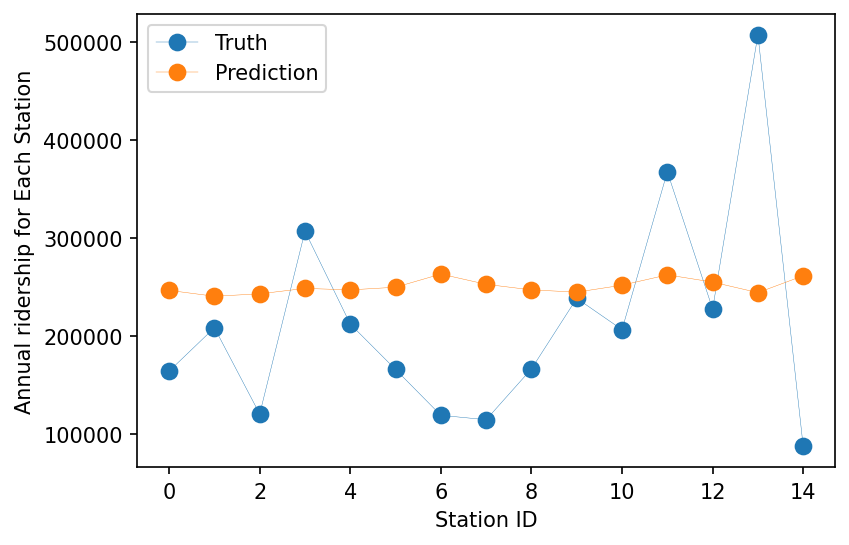

In [25]:
y_pred_torch = model(X_val).cpu().detach().numpy().flatten()
y_val_torch = y_val.cpu().detach().numpy().flatten()

plt.figure(dpi=150)
plt.plot(y_val_torch*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Truth')
plt.plot(y_pred_torch*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Prediction')
plt.xlabel("Station ID")
plt.ylabel("Annual ridership for Each Station")
plt.legend()